# Домашнее задание 2
Задание: Подобрать оптимальные признаки и обучить модель с наименьшей RMSE для yield strength (tensile strength) на 5-fold CV.

In [12]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('Supercon_data.csv')

In [51]:
df = df[0:10000]

In [52]:
from matminer.featurizers.conversions import StrToComposition

In [53]:
stc = StrToComposition()

In [54]:
df = stc.featurize_dataframe(df, 'name')

StrToComposition:  96%|█████████▌| 9599/10000 [05:17<00:13, 30.21it/s] 


KeyboardInterrupt: 

In [22]:
df.head()

,name,Tc,composition
0,Ba0.4K0.6Fe2As2,31.20,"(Ba, K, Fe, As)"
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.10,"(Ca, Ba, La, Cu, O)"
2,Mo0.39Ru0.61,6.90,"(Mo, Ru)"
3,Tm4Os6Sn19,1.10,"(Tm, Os, Sn)"
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.85,"(Nd, Bi, Pb, S, F, O)"


In [23]:
df['composition'].loc[0]

Comp: K0.6 Ba0.4 Fe2 As2

In [24]:
from matminer.featurizers.composition import ElementProperty

In [25]:
ep = ElementProperty.from_preset('magpie')

In [32]:
df_magpie = ep.featurize_dataframe(df, ['composition'])

ElementProperty: 100%|██████████| 100/100 [00:08<00:00, 11.38it/s]


In [33]:
df_magpie.head()

,name,Tc,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ba0.4K0.6Fe2As2,31.20,"(Ba, K, Fe, As)",19.0,56.0,37.0,30.360000,6.214400,26.0,3.0,...,2.110663,0.844265,1.013118,0.0,166.0,229.0,63.0,203.800000,30.240000,166.0
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.10,"(Ca, Ba, La, Cu, O)",8.0,57.0,49.0,22.677795,16.074864,8.0,7.0,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,106.949534,102.911141,12.0
2,Mo0.39Ru0.61,6.90,"(Mo, Ru)",42.0,44.0,2.0,43.220000,0.951600,44.0,50.0,...,0.000000,0.000000,0.000000,0.0,194.0,229.0,35.0,207.650000,16.653000,194.0
3,Tm4Os6Sn19,1.10,"(Tm, Os, Sn)",50.0,76.0,26.0,58.000000,10.482759,50.0,37.0,...,0.000000,0.000000,0.000000,0.0,141.0,194.0,53.0,159.275862,23.947681,141.0
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.85,"(Nd, Bi, Pb, S, F, O)",8.0,83.0,75.0,36.658000,27.869600,16.0,19.0,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,72.206000,49.328776,70.0


In [34]:
df_magpie = df_magpie.drop(['name', 'composition'], axis=1)
df_magpie.head()

,Tc,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,31.20,19.0,56.0,37.0,30.360000,6.214400,26.0,3.0,84.0,81.0,...,2.110663,0.844265,1.013118,0.0,166.0,229.0,63.0,203.800000,30.240000,166.0
1,40.10,8.0,57.0,49.0,22.677795,16.074864,8.0,7.0,87.0,80.0,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,106.949534,102.911141,12.0
2,6.90,42.0,44.0,2.0,43.220000,0.951600,44.0,50.0,56.0,6.0,...,0.000000,0.000000,0.000000,0.0,194.0,229.0,35.0,207.650000,16.653000,194.0
3,1.10,50.0,76.0,26.0,58.000000,10.482759,50.0,37.0,80.0,43.0,...,0.000000,0.000000,0.000000,0.0,141.0,194.0,53.0,159.275862,23.947681,141.0
4,4.85,8.0,83.0,75.0,36.658000,27.869600,16.0,19.0,93.0,74.0,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,72.206000,49.328776,70.0


In [35]:
df_magpie.shape

(100, 133)

In [36]:
df_magpie = df_magpie.loc[:, (df_magpie != 0).any(axis=0)] #убираем нули
df_magpie.dropna(axis=1, inplace=True) #убираем NaN
df_magpie = df_magpie.loc[:, (df_magpie != df_magpie.iloc[0]).any()] #убираем константы

In [37]:
df_magpie.shape

(100, 131)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
# from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [48]:
def plot_diff(ytrain, ytest):
    plt.figure(figsize=(8,6))
    plt.xlabel(u'$T_c-{exp}$')
    plt.ylabel(u'$T_c-{pred}$')
    c = cm.tab10(0)
    plt.scatter(ytrain, ytest, facecolors='none', edgecolors=c, s = [200]*len(ytest), linewidths=3)
    #plt.scatter(ytrain, ytest, colors=c, s = [100]*len(ytest), linewidths=3)
    plt.plot(ytrain, ytrain, '--k')
    plt.grid()
    plt.show()
    rmse = np.sqrt(mse(ytest, ytrain))
    print('RMSE = {0} '.format(rmse))
    return
def LR():
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    ypred_train = lr.predict(X_train)
    ypred_test = lr.predict(X_test)
    plot_diff(y_train, ypred_train)
    plot_diff(y_test, ypred_test)
    rmse = np.sqrt(mse(y_test, ypred_test))
    return 
# def CB():
#     model = CatBoostRegressor()
#     model.fit(X_train, y_train,
#              eval_set=(X_valid, y_valid),
#              use_best_model=True, plot=True)
#     ypred_train = model.predict(X_train)
#     ypred_val = model.predict(X_valid)
#     ypred_test = model.predict(X_test)
    
#     plot_diff(y_train, ypred_train)
#     plot_diff(y_valid, ypred_val)
#     plot_diff(y_test, ypred_test)
#     return model
def NN():
    nn = MLPRegressor(hidden_layer_sizes=(50,50,50,))
    nn.fit(X_train, y_train)
    ypred_train = nn.predict(X_train)
    ypred_test = nn.predict(X_test)
    plot_diff(y_train, ypred_train)
    plot_diff(y_test, ypred_test)
    rmse = np.sqrt(mse(y_test, ypred_test))
    return

In [41]:
X = df_magpie[df_magpie.columns[1:]]
Y = df_magpie['Tc']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, shuffle=True, test_size=0.1, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

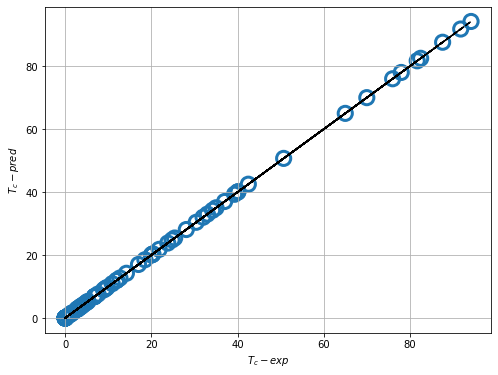

RMSE = 5.2133631758153724e-12 


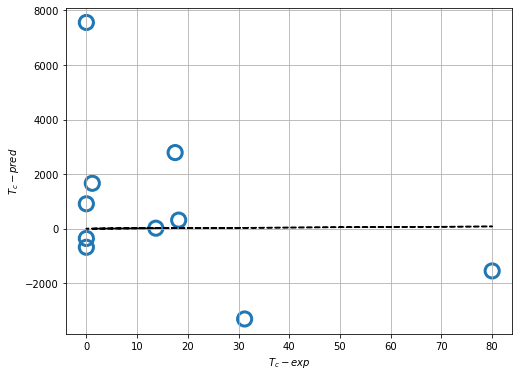

RMSE = 2879.6288002174447 


In [49]:
LR()